<a href="https://colab.research.google.com/github/avirupg8708/MDC-CNN/blob/main/Multi_CNN_FS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Some cells are marked as #CHECK, ar for checking purposes. Some marked as #NOT TO BE EXECUTED should be avoided if not absolutely required 

In [1]:
!pip install mne
!pip install PyIF
!pip install nose
import nose
import mne
import numpy as np
import os
import pandas as pd
import collections
from matplotlib import pyplot as plt
import cv2
from sklearn import preprocessing

     |████████████████████████████████| 7.0MB 10.7MB/s 
     |████████████████████████████████| 163kB 12.7MB/s 


In [2]:
######### MAIN CODE BEGINS ##############
xlsx_file_name='/content/drive/MyDrive/TUH data/seizures_v36r.xlsx'

In [3]:
excel_file = os.path.join(xlsx_file_name)
file_list = pd.read_excel(excel_file, sheet_name='dev', usecols=['Filename'])
patient_id = pd.read_excel(excel_file, sheet_name='dev', usecols=['Patient'])
seizure_type = pd.read_excel(excel_file, sheet_name='dev', usecols=['Seizure Type'])
start_time=pd.read_excel(excel_file, sheet_name='dev', usecols=['Start'])
start_time=(start_time.to_numpy())
stop_time=pd.read_excel(excel_file, sheet_name='dev', usecols=['Stop'])
stop_time=(stop_time.to_numpy())
file_list=np.array(file_list)
patient_id=np.array(patient_id)
seizure_type=np.array(seizure_type)


In [9]:
#CHECK
no=104 ##input the index 
no=no-2 ##adjusting with the seizure file list xlsx
print('file_no:', no)
print(file_list[no])
print('seizure type:',seizure_type[no])
print('start time',start_time[no])
print('stop time',stop_time[no])

file_no: 102
['./dev/01_tcp_ar/046/00004671/s008_2012_08_24/00004671_s008_t000.tse']
seizure type: [nan]
start time [nan]
stop time [nan]


In [10]:
fpath=['intial']
labels=[1]
labels=np.array([labels])

#in our case the initial file was a non seizure one so we initialized according, can be changed.
#the multiplication of sampling freq must be considered so as to not exceed the length 
cl_st=[10]
cl_en=[50]


loc='/content/drive/MyDrive/TUH data' #for google colab
#loc='C:/TUH/v1.1.0/edf' #for PC

for i in range(1,1407):
  if seizure_type[i]==['TCSZ'] or seizure_type[i]==['FNSZ'] or seizure_type[i]==['CPSZ'] or seizure_type[i]==['GNSZ']:
    fl=(file_list[i])
    fl=fl[0]
    #print('Original path: ',fl)
    #print('The file path after stripping: ',fl[6:])
    fl=fl.replace('.tse','.edf')
    s=os.path.join(loc,(fl[6:]))
    #print('The modified path is: ',s) 
    #s=fl.replace(fl[:fl.index[6]],'/content/drive/MyDrive/TUH data')
    if os.path.isfile(s)==True:
      
      fpath.append(s)
      labels=np.append(labels, [[1]], axis=0)
      check_neg=start_time[i]-20
      if check_neg>0:
        cl_st.append(float(start_time[i]-20))
      else:
        cl_st.append(0)  
      cl_en.append(float(stop_time[i]))

    
  else:
    fl=(file_list[i])
    fl=fl[0]
    #print('Original path: ',fl)
    #print('The file path after stripping: ',fl[6:])
    fl=fl.replace('.tse','.edf')
    s=os.path.join(loc,(fl[6:]))
    #print('The modified path is: ',s)
    #fpath.append(str(file_list[i]).replace('.tse','.edf'))
    if os.path.isfile(s)==True:
      
      fpath.append(s)
      labels=np.append(labels, [[0]], axis=0)
      cl_st.append(10)
      cl_en.append(50)

    

fpath=fpath[1:]
labels=labels[1:]
cl_st=cl_st[1:]
cl_en=cl_en[1:]

#print('The modified paths are:',fpath)
print('size of fpath:', len(fpath))
#print('The modified labels are:',labels)
train_labels=labels
print(cl_st)
print(cl_en)

size of fpath: 68
[10, 10, 10, 10, 0, 0, 0, 187.9101, 10, 10, 14.055100000000003, 67.3375, 0, 10, 26.273400000000002, 99.1406, 146.8203, 179.3398, 229.0547, 277.7539, 324.8438, 397.4219, 450.0469, 500.55859999999996, 579.1484, 622.6211, 668.1211, 709.4531, 751.1211, 807.1211, 848.375, 891.1719, 933.0547, 982.0273, 1033.3477, 1074.7461, 1111.9414, 1159.0664, 1206.3477, 1267.9453, 1311.6914, 1352.2188, 1393.9688, 1471.8203, 1531.1211, 1568.793, 1627.0195, 1660.9453, 1704.3281, 1753.2461, 1790.8203, 1839.2188, 1886.8203, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10]
[50, 50, 50, 50, 173.3791, 175.5054, 150.5157, 308.0, 50, 50, 162.3118, 223.0086, 154.51, 50, 52.0742, 125.8398, 172.9219, 208.5391, 256.3516, 303.1523, 351.4453, 425.1211, 477.1484, 527.5586, 605.6484, 649.5195, 695.4219, 736.5547, 779.2188, 833.6211, 875.9727, 918.0742, 960.5547, 1008.2266, 1058.6484, 1099.9453, 1138.8398, 1186.0664, 1232.1484, 1293.0469, 1336.5938, 1378.1211, 1420.0664, 1497.0195, 1556.0195, 1

In [11]:
#CHECK
print(fpath[53])
cl_st[53]
cl_en[53]

/content/drive/MyDrive/TUH data/01_tcp_ar/046/00004671/s008_2012_08_24/00004671_s008_t000.edf


50

In [12]:
### Sampling frequency part ###

def convert(lst): 
    return (lst.split('\t')) 

tse_file_path=[]
fs=[]
for f in fpath:
  fa=f.replace('TUH data', 'seizure/tse')
  fa=fa.replace('.edf','.tse')
  annot_file_path=str(fa)
  print('Path exists: ',os.path.exists(annot_file_path))
  l=len(annot_file_path)
  print('The length of the path is: ',l)
  c=annot_file_path[l-2]
  #print('the l-2 is:',c)
  tse_file_path.append(annot_file_path)
  '''  
  if c=='x':
    print('The file is already converted to a text file')
  else:
    print('Converting the TSE file to a txt file')
    annot_file_path1=annot_file_path.replace('.tse','.txt')
    print('The converted file path is: ',annot_file_path1)
    #os.rename(annot_file_path,annot_file_path1)
    annot_file_path=annot_file_path1 
  '''
  f1 = open(annot_file_path,'r+')
  string_list=f1.readlines() #when using f.read() before f.readlines() the string_list generated due to readlines is shown blank
  print(string_list[6])
  annot=string_list[6]
  f1.close()

  con_annot=convert(annot)
  st_time=float(con_annot[0])
  en_time=float(con_annot[1])
  type_of_seizure=con_annot[2]
  duration=en_time-st_time

  raw = mne.io.read_raw_edf(f, verbose=False)
  channel_data=raw.get_data()
  print('The shape of the data:',channel_data.shape)
  sampling_freq=channel_data.shape[1]/duration
  print('The sampling frequency of the file:',sampling_freq)
  print('***********************************')
  fs.append(sampling_freq)

Path exists:  True
The length of the path is:  96
0.0000	20.0000	bckg	0.985839

The shape of the data: (32, 8000)
The sampling frequency of the file: 400.0
***********************************
Path exists:  True
The length of the path is:  96
0.0000	272.0000	0.301196

The shape of the data: (32, 108800)
The sampling frequency of the file: 400.0
***********************************
Path exists:  True
The length of the path is:  96
0.0000	234.0000	bckg	0.594640

The shape of the data: (32, 93600)
The sampling frequency of the file: 400.0
***********************************
Path exists:  True
The length of the path is:  96
0.0000	224.0000	bckg	0.386299

The shape of the data: (32, 89600)
The sampling frequency of the file: 400.0
***********************************
Path exists:  True
The length of the path is:  96
0.0000	203.0000	bckg	0.229591

The shape of the data: (32, 81200)
The sampling frequency of the file: 400.0
***********************************
Path exists:  True
The length of the

In [ ]:
#CHECK
print(fs)

[400.0, 400.0, 400.0, 400.0, 400.0, 400.0, 400.0, 400.0, 400.0, 400.0, 400.0, 400.0, 400.0, 400.0, 256.0, 256.0, 256.0, 256.0, 256.0, 256.0, 256.0, 256.0, 256.0, 256.0, 256.0, 256.0, 256.0, 256.0, 256.0, 256.0, 256.0, 256.0, 256.0, 256.0, 256.0, 256.0, 256.0, 256.0, 256.0, 256.0, 256.0, 256.0, 256.0, 256.0, 256.0, 256.0, 256.0, 256.0, 256.0, 256.0, 256.0, 256.0, 256.0, 250.0, 256.0, 256.0, 256.0, 256.0, 256.0, 256.0, 256.0, 256.0, 256.0, 256.0, 256.0, 256.0, 256.0, 256.0]


In [ ]:
#NOT TO BE EXECUTED IF ALREADY THE TSE FILES ARE MODIFIED#
'''
TSE file modification
Some TUH-eeg annotation files(.tse files) are in a different format from the majority of the files
The Sampling Freqency Part calculates the FS(sampling frequency) from the TSE files, hence before that we need to bring all to a common format
This portion of the code is meant for modification, only to be executed if files are not modified already. Please note that modifications can
also be made manually 

'''
for i in fs:
  if i!=float(256) or i!=float(400) or i!=float(250):
    ii=fs.index(i)
    fp=tse_file_path[ii]
    f1 = open(fp,'r+')
    string_list=f1.readlines() #when using f.read() before f.readlines() the string_list generated due to readlines is shown blank
    
    annot1=string_list[6]
    annot2=string_list[8] 
    f1.close()

    con_annot1=convert(annot1)
    con_annot2=convert(annot2)
    st_time=float(con_annot1[0])
    en_time=float(con_annot2[1])
    duration=en_time-st_time

    raw = mne.io.read_raw_edf(fpath[ii], verbose=False)
    channel_data=raw.get_data()
    
    sampling_freq=channel_data.shape[1]/duration
    fs[ii]=sampling_freq 

In [ ]:
#CHECK
print(np.sum(np.array(train_labels)))

In [ ]:
#CHECK
print(np.transpose(np.array(fpath[1:])))
print(np.transpose(labels))
print(cl_st)
print(cl_en)

#print(labels[1:])

Next there are some algorithms mentioned, PCC, PLV, TE. By default PLV and TE are chosen and accordingly subsequent outputs will be fed to the MULTI CNN. Run only those which are required.

In [ ]:
## PCC ##

train_data=[]
for f in fpath:
  print(f)
  raw = mne.io.read_raw_edf(f, verbose=False)
  channel_data=raw.get_data()
  sh=channel_data.shape[0]
  s=(sh, sh)
  pcc2=np.zeros(s)
  ch_ls=[]
  for x in range(0, sh):
    ch_ls.append(channel_data[x])
    

  #print(ch_ls)
  pcc2=np.corrcoef(ch_ls)
  if (np.any(np.isnan(pcc2)))==True:
        pcc2=0
  if (np.any(np.isinf(pcc2)))==True:
        pcc2=1
  pcc2=cv2.resize(pcc2, (32,32))
  
  #np.append(train_data,pcc2, axis=0)
  
  pcc2=preprocessing.normalize(pcc2)#additional normalization layer checks whether any data is NaN
  train_data.append(pcc2)


In [13]:
### FOR BANDPASS Filter##
'Enter the upper and lower frequncy according to Delta '
l_frequency=int(input('Enter the lower cutoff frequency: '))
h_frequency=int(input('Enter the higher cutoff frequency: '))

Enter the lower cutoff frequency: 1
Enter the higher cutoff frequency: 100


In [14]:
## PLV ##
import numpy as np
import scipy.signal as sig

def hilphase(y1,y2):
    sig1_hill=sig.hilbert(y1)
    sig2_hill=sig.hilbert(y2)
    pdt=(np.inner(sig1_hill,np.conj(sig2_hill))/(np.sqrt(np.inner(sig1_hill,
               np.conj(sig1_hill))*np.inner(sig2_hill,np.conj(sig2_hill)))))
    phase = np.angle(pdt)

    return phase

train_data_plv=[]
ii=0
for f in fpath:
  print(f, ii+1)
  raw = mne.io.read_raw_edf(f, verbose=False)
  ##
  raw.load_data()
  
  raw=raw.filter(l_freq=l_frequency, h_freq=h_frequency)
  ##
  channel_data=raw.get_data()
  #print(np.all(np.isnan(channel_data)))
  #print(np.all(np.isinf(channel_data)))
  channel_data=channel_data[:, int(cl_st[ii]*fs[ii]):int(cl_en[ii]*fs[ii])]
  print('Starting and Ending point respectively: ',int(cl_st[ii]*fs[ii]),int(cl_en[ii]*fs[ii]))
  sh=channel_data.shape[0]
  ii=ii+1
  
  s=(sh, sh)
  plv2=np.zeros(s)
  ch_ls=[]
  for i in range(0, sh):
    for j in range(0,sh):
      plv2[i][j]=hilphase(channel_data[i], channel_data[j])
      if (np.any(np.isnan(plv2[i][j])))==True:
        plv2[i][j]=0
      if (np.any(np.isinf(plv2[i][j])))==True:
        plv2[i][j]=1 

  #np.append(train_data,pcc2, axis=0)
  plv2=cv2.resize(plv2, (32,32))
  
  plv2=preprocessing.normalize(plv2)#additional normalization layer checks whether any data is NaN
  train_data_plv.append(plv2)

/content/drive/MyDrive/TUH data/01_tcp_ar/002/00000258/s002_2003_07_21/00000258_s002_t000.edf 1
4000 20000
/content/drive/MyDrive/TUH data/01_tcp_ar/002/00000258/s002_2003_07_21/00000258_s002_t002.edf 2
4000 20000
/content/drive/MyDrive/TUH data/01_tcp_ar/002/00000258/s003_2003_07_22/00000258_s003_t000.edf 3
4000 20000
/content/drive/MyDrive/TUH data/01_tcp_ar/002/00000258/s003_2003_07_22/00000258_s003_t001.edf 4
4000 20000
/content/drive/MyDrive/TUH data/01_tcp_ar/002/00000258/s003_2003_07_22/00000258_s003_t002.edf 5
0 69351
/content/drive/MyDrive/TUH data/01_tcp_ar/002/00000258/s003_2003_07_22/00000258_s003_t003.edf 6
0 70202
/content/drive/MyDrive/TUH data/01_tcp_ar/002/00000258/s003_2003_07_22/00000258_s003_t004.edf 7
0 60206
/content/drive/MyDrive/TUH data/01_tcp_ar/002/00000258/s003_2003_07_22/00000258_s003_t005.edf 8
75164 123200
/content/drive/MyDrive/TUH data/01_tcp_ar/010/00001027/s003_2004_01_29/00001027_s003_t000.edf 9
4000 20000
/content/drive/MyDrive/TUH data/01_tcp_ar/01

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in cdouble_scalars
  if __name__ == '__main__':


/content/drive/MyDrive/TUH data/01_tcp_ar/046/00004671/s007_2012_08_04/00004671_s007_t000.edf 16
25379 32214


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in cdouble_scalars
  if __name__ == '__main__':


/content/drive/MyDrive/TUH data/01_tcp_ar/046/00004671/s007_2012_08_04/00004671_s007_t000.edf 17
37585 44268


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in cdouble_scalars
  if __name__ == '__main__':


/content/drive/MyDrive/TUH data/01_tcp_ar/046/00004671/s007_2012_08_04/00004671_s007_t000.edf 18
45910 53386


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in cdouble_scalars
  if __name__ == '__main__':


/content/drive/MyDrive/TUH data/01_tcp_ar/046/00004671/s007_2012_08_04/00004671_s007_t000.edf 19
58638 65626


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in cdouble_scalars
  if __name__ == '__main__':


/content/drive/MyDrive/TUH data/01_tcp_ar/046/00004671/s007_2012_08_04/00004671_s007_t000.edf 20
71104 77606


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in cdouble_scalars
  if __name__ == '__main__':


/content/drive/MyDrive/TUH data/01_tcp_ar/046/00004671/s007_2012_08_04/00004671_s007_t000.edf 21
83160 89969


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in cdouble_scalars
  if __name__ == '__main__':


/content/drive/MyDrive/TUH data/01_tcp_ar/046/00004671/s007_2012_08_04/00004671_s007_t000.edf 22
101740 108831


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in cdouble_scalars
  if __name__ == '__main__':


/content/drive/MyDrive/TUH data/01_tcp_ar/046/00004671/s007_2012_08_04/00004671_s007_t000.edf 23
115212 122149


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in cdouble_scalars
  if __name__ == '__main__':


/content/drive/MyDrive/TUH data/01_tcp_ar/046/00004671/s007_2012_08_04/00004671_s007_t000.edf 24
128143 135055


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in cdouble_scalars
  if __name__ == '__main__':


/content/drive/MyDrive/TUH data/01_tcp_ar/046/00004671/s007_2012_08_04/00004671_s007_t000.edf 25
148261 155045


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in cdouble_scalars
  if __name__ == '__main__':


/content/drive/MyDrive/TUH data/01_tcp_ar/046/00004671/s007_2012_08_04/00004671_s007_t000.edf 26
159391 166276


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in cdouble_scalars
  if __name__ == '__main__':


/content/drive/MyDrive/TUH data/01_tcp_ar/046/00004671/s007_2012_08_04/00004671_s007_t000.edf 27
171039 178028


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in cdouble_scalars
  if __name__ == '__main__':


/content/drive/MyDrive/TUH data/01_tcp_ar/046/00004671/s007_2012_08_04/00004671_s007_t000.edf 28
181619 188558


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in cdouble_scalars
  if __name__ == '__main__':


/content/drive/MyDrive/TUH data/01_tcp_ar/046/00004671/s007_2012_08_04/00004671_s007_t000.edf 29
192287 199480


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in cdouble_scalars
  if __name__ == '__main__':


/content/drive/MyDrive/TUH data/01_tcp_ar/046/00004671/s007_2012_08_04/00004671_s007_t000.edf 30
206623 213407


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in cdouble_scalars
  if __name__ == '__main__':


/content/drive/MyDrive/TUH data/01_tcp_ar/046/00004671/s007_2012_08_04/00004671_s007_t000.edf 31
217184 224249


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in cdouble_scalars
  if __name__ == '__main__':


/content/drive/MyDrive/TUH data/01_tcp_ar/046/00004671/s007_2012_08_04/00004671_s007_t000.edf 32
228140 235026


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in cdouble_scalars
  if __name__ == '__main__':


/content/drive/MyDrive/TUH data/01_tcp_ar/046/00004671/s007_2012_08_04/00004671_s007_t000.edf 33
238862 245902


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in cdouble_scalars
  if __name__ == '__main__':


/content/drive/MyDrive/TUH data/01_tcp_ar/046/00004671/s007_2012_08_04/00004671_s007_t000.edf 34
251398 258106


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in cdouble_scalars
  if __name__ == '__main__':


/content/drive/MyDrive/TUH data/01_tcp_ar/046/00004671/s007_2012_08_04/00004671_s007_t000.edf 35
264537 271013


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in cdouble_scalars
  if __name__ == '__main__':


/content/drive/MyDrive/TUH data/01_tcp_ar/046/00004671/s007_2012_08_04/00004671_s007_t000.edf 36
275135 281585


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in cdouble_scalars
  if __name__ == '__main__':


/content/drive/MyDrive/TUH data/01_tcp_ar/046/00004671/s007_2012_08_04/00004671_s007_t000.edf 37
284656 291542


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in cdouble_scalars
  if __name__ == '__main__':


/content/drive/MyDrive/TUH data/01_tcp_ar/046/00004671/s007_2012_08_04/00004671_s007_t000.edf 38
296720 303632


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in cdouble_scalars
  if __name__ == '__main__':


/content/drive/MyDrive/TUH data/01_tcp_ar/046/00004671/s007_2012_08_04/00004671_s007_t000.edf 39
308825 315429


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in cdouble_scalars
  if __name__ == '__main__':


/content/drive/MyDrive/TUH data/01_tcp_ar/046/00004671/s007_2012_08_04/00004671_s007_t000.edf 40
324593 331020


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in cdouble_scalars
  if __name__ == '__main__':


/content/drive/MyDrive/TUH data/01_tcp_ar/046/00004671/s007_2012_08_04/00004671_s007_t000.edf 41
335792 342168


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in cdouble_scalars
  if __name__ == '__main__':


/content/drive/MyDrive/TUH data/01_tcp_ar/046/00004671/s007_2012_08_04/00004671_s007_t000.edf 42
346168 352799


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in cdouble_scalars
  if __name__ == '__main__':


/content/drive/MyDrive/TUH data/01_tcp_ar/046/00004671/s007_2012_08_04/00004671_s007_t000.edf 43
356856 363536


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in cdouble_scalars
  if __name__ == '__main__':


/content/drive/MyDrive/TUH data/01_tcp_ar/046/00004671/s007_2012_08_04/00004671_s007_t000.edf 44
376785 383236


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in cdouble_scalars
  if __name__ == '__main__':


/content/drive/MyDrive/TUH data/01_tcp_ar/046/00004671/s007_2012_08_04/00004671_s007_t000.edf 45
391967 398340


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in cdouble_scalars
  if __name__ == '__main__':


/content/drive/MyDrive/TUH data/01_tcp_ar/046/00004671/s007_2012_08_04/00004671_s007_t000.edf 46
401611 408292


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in cdouble_scalars
  if __name__ == '__main__':


/content/drive/MyDrive/TUH data/01_tcp_ar/046/00004671/s007_2012_08_04/00004671_s007_t000.edf 47
416516 422968


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in cdouble_scalars
  if __name__ == '__main__':


/content/drive/MyDrive/TUH data/01_tcp_ar/046/00004671/s007_2012_08_04/00004671_s007_t000.edf 48
425201 431857


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in cdouble_scalars
  if __name__ == '__main__':


/content/drive/MyDrive/TUH data/01_tcp_ar/046/00004671/s007_2012_08_04/00004671_s007_t000.edf 49
436307 442861


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in cdouble_scalars
  if __name__ == '__main__':


/content/drive/MyDrive/TUH data/01_tcp_ar/046/00004671/s007_2012_08_04/00004671_s007_t000.edf 50
448831 455436


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in cdouble_scalars
  if __name__ == '__main__':


/content/drive/MyDrive/TUH data/01_tcp_ar/046/00004671/s007_2012_08_04/00004671_s007_t000.edf 51
458449 465132


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in cdouble_scalars
  if __name__ == '__main__':


/content/drive/MyDrive/TUH data/01_tcp_ar/046/00004671/s007_2012_08_04/00004671_s007_t000.edf 52
470840 477752


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in cdouble_scalars
  if __name__ == '__main__':


/content/drive/MyDrive/TUH data/01_tcp_ar/046/00004671/s007_2012_08_04/00004671_s007_t000.edf 53
483025 489887


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in cdouble_scalars
  if __name__ == '__main__':


/content/drive/MyDrive/TUH data/01_tcp_ar/046/00004671/s008_2012_08_24/00004671_s008_t000.edf 54
2500 12500


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in cdouble_scalars
  if __name__ == '__main__':


/content/drive/MyDrive/TUH data/01_tcp_ar/046/00004671/s009_2012_09_17/00004671_s009_t000.edf 55
2560 12800


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in cdouble_scalars
  if __name__ == '__main__':


/content/drive/MyDrive/TUH data/01_tcp_ar/046/00004671/s009_2012_09_17/00004671_s009_t001.edf 56
2560 12800
/content/drive/MyDrive/TUH data/01_tcp_ar/046/00004671/s010_2013_07_08/00004671_s010_t000.edf 57
2560 12800


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in cdouble_scalars
  if __name__ == '__main__':


/content/drive/MyDrive/TUH data/01_tcp_ar/046/00004671/s011_2013_07_08/00004671_s011_t000.edf 58
2560 12800


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in cdouble_scalars
  if __name__ == '__main__':


/content/drive/MyDrive/TUH data/01_tcp_ar/046/00004671/s011_2013_07_08/00004671_s011_t001.edf 59
2560 12800


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in cdouble_scalars
  if __name__ == '__main__':


/content/drive/MyDrive/TUH data/01_tcp_ar/046/00004671/s011_2013_07_08/00004671_s011_t002.edf 60
2560 12800
/content/drive/MyDrive/TUH data/01_tcp_ar/046/00004671/s011_2013_07_08/00004671_s011_t003.edf 61
2560 12800


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in cdouble_scalars
  if __name__ == '__main__':


/content/drive/MyDrive/TUH data/01_tcp_ar/046/00004671/s011_2013_07_08/00004671_s011_t004.edf 62
2560 12800


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in cdouble_scalars
  if __name__ == '__main__':


/content/drive/MyDrive/TUH data/01_tcp_ar/046/00004671/s011_2013_07_08/00004671_s011_t005.edf 63
2560 12800
/content/drive/MyDrive/TUH data/01_tcp_ar/046/00004671/s011_2013_07_08/00004671_s011_t006.edf 64
2560 12800
/content/drive/MyDrive/TUH data/01_tcp_ar/046/00004671/s011_2013_07_08/00004671_s011_t007.edf 65
2560 12800


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in cdouble_scalars
  if __name__ == '__main__':


/content/drive/MyDrive/TUH data/01_tcp_ar/046/00004671/s011_2013_07_08/00004671_s011_t008.edf 66
2560 12800


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in cdouble_scalars
  if __name__ == '__main__':


/content/drive/MyDrive/TUH data/01_tcp_ar/046/00004671/s011_2013_07_08/00004671_s011_t009.edf 67
2560 12800
/content/drive/MyDrive/TUH data/01_tcp_ar/046/00004671/s011_2013_07_08/00004671_s011_t010.edf 68
2560 12800


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in cdouble_scalars
  if __name__ == '__main__':


In [ ]:
## TE ##
from PyIF import te_compute as te

train_data_te=[]
ii=0
for f in fpath:
  print(f, ii+1)
  raw = mne.io.read_raw_edf(f, verbose=False)
  ##
  raw.load_data()
  
  raw=raw.filter(l_freq=l_frequency, h_freq=h_frequency)
  ##
  
  channel_data=raw.get_data()
  channel_data=channel_data[:, int(cl_st[ii]*fs[ii]):int(cl_en[ii]*fs[ii])]
  sh=channel_data.shape[0]
  ii=ii+1
  s=(sh, sh)
  te2=np.zeros(s)
  ch_ls=[]
  for i in range(0, sh):
    for j in range(0,sh):
      te2[i][j]=te.te_compute(channel_data[i], channel_data[j], k=1, embedding =1, GPU=False)
      if (np.any(np.isnan(te2[i][j])))==True:
        te2[i][j]=0
      if (np.any(np.isinf(te2[i][j])))==True:
        te2[i][j]=1  

  #np.append(train_data,pcc2, axis=0)
  te2=cv2.resize(te2, (32,32))
  te2=preprocessing.normalize(te2)#additional normalization layer checks whether any data is NaN
  train_data_te.append(te2)

In [ ]:
######### CNN SECTION ##########

Next is the CNN section. Cells are marked separately for PLV and TE

In [15]:
#for PLV
train_data_plv=np.array(train_data_plv)

#assert not np.any(np.isnan(train_data))
print('The shape of the train data', train_data_plv.shape)

The shape of the train data (68, 32, 32)


In [ ]:
#for TE
train_data_te=np.array(train_data_te)

#assert not np.any(np.isnan(train_data))
print('The shape of the train data', train_data_te.shape)

In [ ]:
#CHECK
#optional for visualizing the data
t=np.size(train_data, 0) 
for x in range(0,t):
  print('The image of the correlation of file', x+1)
  plt.subplot(1, t, x+1)
  plt.imshow(train_data[x])
  plt.title('Image:'+ str(x+1))

plt.show() 
#plt.imshow(train_data[5])

plt.plot(train_data[5])

In [16]:
import tensorflow as tf
from tensorflow import keras
from sklearn import preprocessing
import numpy as np
from keras.utils import np_utils
from keras import backend as K
from keras.models import Sequential, Model
from keras.layers import concatenate, Input  
from keras.layers.core import Dense, Flatten, Activation, Dropout
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.datasets import cifar10
from keras.optimizers import Adam, RMSprop
import matplotlib.pyplot as plt
import cv2

In [17]:
class MDC:
  @staticmethod
  def build(input_shape, classes):
    #channel 1
    input1=Input(shape=(input_shape))
    conv11=Conv2D(128, kernel_size=5, padding='same', activation='relu')(input1)
    conv12=Conv2D(128, kernel_size=5, padding='same', activation='relu')(conv11)
    pool11=MaxPooling2D(pool_size=(2, 2))(conv12)
    conv13=Conv2D(128, kernel_size=5, padding='same', activation='relu')(pool11)
    conv14=Conv2D(128, kernel_size=5, padding='same', activation='relu')(conv13)
    pool12=MaxPooling2D(pool_size=(2, 2))(conv14)
    flat1=Flatten()(pool12)

    #channel 2
    input2=Input(shape=(input_shape))
    conv21=Conv2D(128, kernel_size=5, padding='same', activation='relu')(input2)
    conv22=Conv2D(128, kernel_size=5, padding='same', activation='relu')(conv21)
    pool21=MaxPooling2D(pool_size=(2, 2))(conv22)
    conv23=Conv2D(128, kernel_size=5, padding='same', activation='relu')(pool21)
    conv24=Conv2D(128, kernel_size=5, padding='same', activation='relu')(conv23)
    pool22=MaxPooling2D(pool_size=(2, 2))(conv24)
    flat2=Flatten()(pool22)
    #merge
    
    merged=concatenate([flat1, flat2])
    dense1= Dense(500, activation='relu')(merged)
    drop1=Dropout(0.1)(dense1)
    
    #Classifier
    dense2=Dense(classes, activation='softmax')(drop1)
    model=Model(inputs=[input1, input2], outputs=dense2)
  
    print(model.summary())
    
    return model

In [18]:
#For PLV generates x_train1
img_rows=32
img_cols=32
img_channels=1
input_shape=(img_rows, img_cols, img_channels)
classes=2

x_train1=train_data_plv.astype('float32')

y_train=train_labels
y_train=np_utils.to_categorical(y_train, classes)

#x_train=x_train
x_train1=np.expand_dims(x_train1, axis=3)

print('The shape of the train_data: ', x_train1.shape)

The shape of the train_data:  (68, 32, 32, 1)


In [ ]:
#For TE generates x_train2
img_rows=32
img_cols=32
img_channels=1
input_shape=(img_rows, img_cols, img_channels)
classes=2

x_train2=train_data_te.astype('float32')

y_train=train_labels
y_train=np_utils.to_categorical(y_train, classes)

x_train2=np.expand_dims(x_train2, axis=3)

print('The shape of the train_data: ', x_train2.shape)

In [19]:
model=MDC.build(input_shape, classes)

model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy', 'TruePositives', 'FalseNegatives', 'TrueNegatives', 'FalsePositives'])
history=model.fit([x_train1, x_train1], y_train, validation_split=0.1, batch_size=15, epochs=20, verbose=1)


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 32, 32, 1)]  0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 32, 32, 1)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 32, 32, 128)  3328        input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_4 (Conv2D)               (None, 32, 32, 128)  3328        input_2[0][0]                    
______________________________________________________________________________________________

Accuracy:  [0.70491803 0.75409836 0.75409836 0.81967211 0.80327868 0.83606559
 0.91803277 0.93442625 0.96721309 0.93442625 0.95081967 0.98360658
 1.         1.         0.98360658 1.         1.         1.
 1.         1.        ]
sensitivity:  [0.70491803 0.75409836 0.75409836 0.81967213 0.80327869 0.83606557
 0.91803279 0.93442623 0.96721311 0.93442623 0.95081967 0.98360656
 1.         1.         0.98360656 1.         1.         1.
 1.         1.        ]
specificity:  [0.70491803 0.75409836 0.75409836 0.81967213 0.80327869 0.83606557
 0.91803279 0.93442623 0.96721311 0.93442623 0.95081967 0.98360656
 1.         1.         0.98360656 1.         1.         1.
 1.         1.        ]
false_positive_rate:  [0.29508197 0.24590164 0.24590164 0.18032787 0.19672131 0.16393443
 0.08196721 0.06557377 0.03278689 0.06557377 0.04918033 0.01639344
 0.         0.         0.01639344 0.         0.         0.
 0.         0.        ]


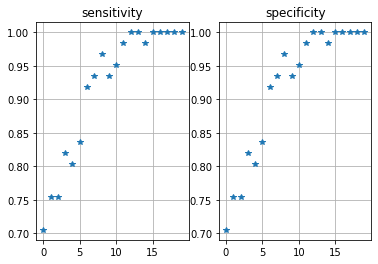

Text(0.5, 1.0, 'Accuracy')

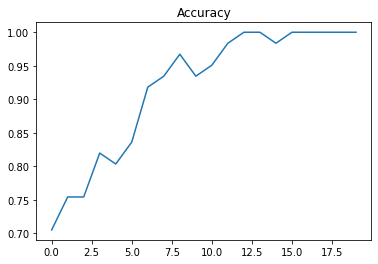

In [20]:
tp=np.array(history.history['true_positives'])
fn=np.array(history.history['false_negatives'])
tn=np.array(history.history['true_negatives'])
fp=np.array(history.history['false_positives'])

sensitivity=np.divide(tp,np.add(tp,fn))
specificity=np.divide(tn,np.add(tn,fp))
false_positive_rate=np.divide(fp,np.add(tn,fp))

print('Accuracy: ', np.array(history.history['accuracy']))
print('sensitivity: ', sensitivity)
print('specificity: ', specificity)
print('false_positive_rate: ', false_positive_rate)

plt.subplot(1, 2, 1)
plt.plot(sensitivity,'*')
#plt.scatter(sensitivity)
plt.title('sensitivity')

plt.grid()

plt.subplot(1, 2, 2)
plt.plot(specificity, '*')
#plt.scatter(specificity)
plt.title('specificity')

plt.grid()

plt.show()

plt.plot(history.history['accuracy'])
plt.title('Accuracy')